# Projeto Nanodegree

## Alunos:
- **Bruno Pasquetti**
- **Gabriel Brocco de Oliveira**
- **Pedro Henrique de Bortoli**
- **Rafael Augusto Klein**

## 1. Introdução E Objetivos

### 1.1 Contexto do Problema
A evasão de alunos é um dos maiores desafios para plataformas de ensino online. Identificar estudantes em risco de abandonar um curso permite que a instituição tome ações proativas, como oferecer suporte personalizado, ajustar o conteúdo ou criar campanhas de reengajamento.

Este projeto foca em analisar dados de interação de alunos em um curso online síncrono da PensComp para construir um modelo preditivo de evasão.

### 1.2 Objetivos da Análise
- **1.** **Análise Exploratória**: Entender o comportamento dos alunos, identificando padrões de uso e engajamento.
- **2.** **Engenharia de Features**: Criar variáveis que ajudem a identificar o risco de evasão, como um indicador de "evadiu" e perfis de risco.
- **3.** **Modelagem Preditiva**: Treinar e avaliar diferentes modelos de Machine Learning (Regressão Logística, Random Forest e Redes Neurais) para prever a probabilidade de um aluno evadir.
- **4.** **Validação**: Testar o modelo final em um conjunto de dados real e não visto para avaliar sua performance em um cenário prático.

### 1.3 Dicionário de Variáveis

O conjunto de dados contém informações sobre a atividade e o desempenho dos alunos. As colunas são agrupadas por prefixos:

- **ds_***: Colunas categóricas (descritivas).
- **ts_***: Colunas temporais (timestamps).
- **nr_***: Colunas numéricas de contagem.
- **vl_***: Colunas numéricas de valores ou médias.

## 2. Configuração do Ambiente

Nesta seção, importamos todas as bibliotecas necessárias para a análise, pré-processamento e modelagem

In [ ]:
# Instalação de biblioteca para tratamento de strings (acentos)
!pip install unidecode

# Bibliotecas para manipulação e análise de dados
import pandas as pd
import numpy as np
import unidecode

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de Machine Learning e pré-processamento
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

# Bibliotecas para Redes Neurais com TensorFlow/Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Configurações de visualização
sns.set_style("whitegrid")
%matplotlib inline

: 

## 3. Carga e Análise Inicial dos Dados

Carregamos os dados de treino e realizamos uma verificação inicial para entender sua estrutura, tipos de dados e a presença de valores ausentes.

In [ ]:
# Carregamento do dataset de treino
df = pd.read_csv('dados_projeto_evasao_treino - Copia.csv')

In [ ]:
# Verificando a estrutura e os tipos de dados do DataFrame
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            400 non-null    int64  
 1   ds_cidade_usuario                     346 non-null    object 
 2   ts_primeiro_acesso                    400 non-null    int64  
 3   ts_ultimo_acesso                      400 non-null    int64  
 4   nr_dias_desde_primeiro_acesso         400 non-null    int64  
 5   nr_dias_desde_ultimo_acesso           400 non-null    int64  
 6   nr_atividades_sinalizadas             400 non-null    int64  
 7   nr_atividades_mapeadas                400 non-null    int64  
 8   nr_discussoes_forum_postadas          400 non-null    int64  
 9   nr_questionarios_abandonados          400 non-null    int64  
 10  nr_questionarios_finalizados          400 non-null    int64  
 11  vl_medio_tempo_ques

In [76]:
# Amostra dos dados
df.head()

,Unnamed: 0,ds_cidade_usuario,ts_primeiro_acesso,ts_ultimo_acesso,nr_dias_desde_primeiro_acesso,nr_dias_desde_ultimo_acesso,nr_atividades_sinalizadas,nr_atividades_mapeadas,nr_discussoes_forum_postadas,nr_questionarios_abandonados,...,nr_questoes_parciais,vl_desempenho_usuario,vl_media_questoes_por_dia,vl_engajamento_notas,nr_itens_avaliados,nr_itens_nao_respondidos,vl_media_notas,nr_submissoes_codigo,vl_media_submissoes_codigo,vl_submissoes_por_dias_ativos
0,1,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
1,3,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
2,4,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
3,5,NaN,1692744534,1693928454,20,6,0,4,0,0,...,0,1.0,NaN,NaN,1,62,1.0,0,NaN,NaN
4,6,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN


In [77]:
# Classificação das colunas por tipo de prefixo
categoricas = [col for col in df.columns if col.startswith("ds_")]
temporais = [col for col in df.columns if col.startswith("ts_")]
numericas_nr = [col for col in df.columns if col.startswith("nr_")]
numericas_vl = [col for col in df.columns if col.startswith("vl_")]

print("\nColunas categóricas:", categoricas)
print("Colunas temporais:", temporais)
print("Colunas numéricas (contagem - nr_):", numericas_nr)
print("Colunas numéricas (valores/escalares - vl_):", numericas_vl)


Colunas categóricas: ['ds_cidade_usuario']
Colunas temporais: ['ts_primeiro_acesso', 'ts_ultimo_acesso']
Colunas numéricas (contagem - nr_): ['nr_dias_desde_primeiro_acesso', 'nr_dias_desde_ultimo_acesso', 'nr_atividades_sinalizadas', 'nr_atividades_mapeadas', 'nr_discussoes_forum_postadas', 'nr_questionarios_abandonados', 'nr_questionarios_finalizados', 'nr_intervalos_uso', 'nr_dias_uso', 'nr_interacoes_usuario', 'nr_dias_engajamento_discussao', 'nr_dias_engajamento_questionario', 'nr_engajamento_discussao', 'nr_engajamento_questionario', 'nr_questoes_respondidas', 'nr_questoes_corretas', 'nr_questoes_erradas', 'nr_questoes_parciais', 'nr_itens_avaliados', 'nr_itens_nao_respondidos', 'nr_submissoes_codigo']
Colunas numéricas (valores/escalares - vl_): ['vl_medio_tempo_questionario', 'vl_medio_tempo_questionario_avaliado', 'vl_desempenho_questionario', 'vl_medio_atividade_diaria', 'vl_engajamento_usuario_por_intervalo', 'vl_engajamento_usuario_intradia', 'vl_desempenho_usuario', 'vl_m

### Analise Inicial:
- O dataset possui 400 linhas e 37 colunas.
- Há uma coluna Unnamed: 0 que parece ser um índice residual e deve ser removida.
- As colunas ts_primeiro_acesso e ts_ultimo_acesso estão como int64 e precisam ser convertidas para datetime.
- Diversas colunas, especialmente as com prefixo vl_, possuem uma grande quantidade de valores nulos, que precisarão de tratamento.

## 4. Limpeza e Pré-Processamento dos dados

Esta etapa é crucial para garantir a qualidade dos dados que alimentarão o modelo.


### 4.1 Remoção de Colunas e Registros Inválidos

- Removemos a coluna Unnamed: 0, que não possui valor analítico.
- Filtramos os alunos com ts_primeiro_acesso igual a 0, pois eles nunca acessaram a plataforma e não podem ser considerados no estudo de evasão.

In [ ]:
# Removendo a coluna de índice
df = df.drop("Unnamed: 0", axis=1)

# Filtrando apenas alunos que acessaram a plataforma
df = df[df['ts_primeiro_acesso'] != 0]

### 4.2 Tratamento de Colunas Temporais e Categóricas

- Convertemos as colunas de timestamp para o formato datetime.
- Padronizamos a coluna ds_cidade_usuario: removemos espaços, convertemos para maiúsculas, tiramos acentos e substituímos valores nulos por "CIDADE NAO INFORMADA".

In [ ]:
# Conversão das colunas de timestamp
df['ts_primeiro_acesso'] = pd.to_datetime(df['ts_primeiro_acesso'], unit='s')
df['ts_ultimo_acesso'] = pd.to_datetime(df['ts_ultimo_acesso'], unit='s')

# Limpeza e formatação da coluna de cidade
df['ds_cidade_usuario'] = (
    df['ds_cidade_usuario']
    .astype(str)
    .str.strip()
    .str.upper()
    .apply(unidecode.unidecode)
)
df['ds_cidade_usuario'].replace("NAN", "CIDADE NAO INFORMADA", inplace=True)

In [ ]:
print(df['ds_cidade_usuario'].unique())

### 4.3 Tratamento de Valores Ausentes (Nulos)

In [78]:
# Verificando colunas que possuam ao menos um item nulo
missing = (df.isnull().mean() * 100).sort_values(ascending=True)

print("\nProporção de valores ausentes por coluna (%):")
print(missing[missing > 0].round(2))


Proporção de valores ausentes por coluna (%):
ds_cidade_usuario                       13.50
vl_medio_atividade_diaria               47.75
nr_intervalos_uso                       47.75
vl_desempenho_usuario                   71.75
vl_media_notas                          71.75
vl_medio_tempo_questionario             72.25
vl_medio_tempo_questionario_avaliado    73.25
vl_engajamento_notas                    84.75
vl_media_questoes_por_dia               84.75
vl_engajamento_usuario_por_intervalo    92.75
vl_engajamento_usuario_intradia         92.75
vl_desempenho_questionario              93.25
vl_submissoes_por_dias_ativos           98.00
vl_media_submissoes_codigo              99.00
dtype: float64


#### Tratamento de Valores Ausentes

Durante a análise, identificamos 5 colunas com altos índices de valores nulos:

- `vl_media_submissoes_codigo` (~99%)
- `vl_submissoes_por_dias_ativos` (~98%)
- `vl_desempenho_questionario` (~93%)
- `vl_engajamento_usuario_por_intervalo` (~92.75%)
- `vl_engajamento_usuario_intradia` (~92.75%)

#### Estratégia 1: Colunas removidas
As duas primeiras foram removidas por conterem dados ausentes em quase todos os registros, o que inviabiliza sua utilização estatística ou em modelos preditivos.

#### Estratégia 2: Colunas preenchidas com zero
As demais colunas foram mantidas e os valores nulos preenchidos com **zero**, assumindo que a ausência dos dados representa **falta de atividade do usuário** (ex: nenhum questionário feito, nenhum engajamento detectado). Isso mantém a coerência da análise com o objetivo de detectar evasão por inatividade.


In [88]:
# Remover colunas com mais de 70% de valores ausentes
df.drop(columns=["vl_media_submissoes_codigo", "vl_submissoes_por_dias_ativos"], inplace=True)
df.drop(columns=["vl_media_questoes_por_dia", "vl_engajamento_notas"], inplace=True)

In [89]:
# Preencher a coluna de desempenho com zero
df["vl_desempenho_questionario"] = df["vl_desempenho_questionario"].fillna(0)
df["vl_engajamento_usuario_por_intervalo"] = df["vl_engajamento_usuario_por_intervalo"].fillna(0)
df["vl_engajamento_usuario_intradia"] = df["vl_engajamento_usuario_intradia"].fillna(0)
df["vl_desempenho_usuario"] = df["vl_desempenho_usuario"].fillna(0)
df["vl_media_notas"] = df["vl_media_notas"].fillna(0)

#### Estratégia 3: Preenchimento com a Mediana

Ao lidar com variáveis contínuas como tempo médio de questionário (`vl_medio_tempo_questionario`) e tempo médio em questionários avaliados (`vl_medio_tempo_questionario_avaliado`), optamos por preencher os valores ausentes com a **mediana**.

A **mediana** é o valor central de uma distribuição ordenada — ou seja, separa os 50% menores dos 50% maiores valores. Diferente da **média**, a mediana **não é afetada por outliers ou valores extremos**, o que a torna mais robusta para representar o "comportamento típico" dos dados, especialmente em distribuições assimétricas ou com grande variação.

#### Vantagens de usar a mediana:
- Evita distorção causada por tempos muito longos ou muito curtos.
- Mantém a coerência estatística da variável.
- Preserva o padrão geral da distribuição sem inflar ou achatar artificialmente os dados.

Dessa forma, preenchemos os dados faltantes sem comprometer a qualidade da análise ou da modelagem futura.


In [90]:
#Preencher com mediana (tempo médio tem sentido contínuo e comparável):
df["vl_medio_tempo_questionario"] = df["vl_medio_tempo_questionario"].fillna(df["vl_medio_tempo_questionario"].median())
df["vl_medio_tempo_questionario_avaliado"] = df["vl_medio_tempo_questionario_avaliado"].fillna(df["vl_medio_tempo_questionario_avaliado"].median())

## 5. Análise Exploratória de Dados (EDA)

### 5.1 Análise de Engajamento por Cidade

Analisamos a média de interações dos alunos por cidade, permitindo identificar regiões com maior ou menor participação.

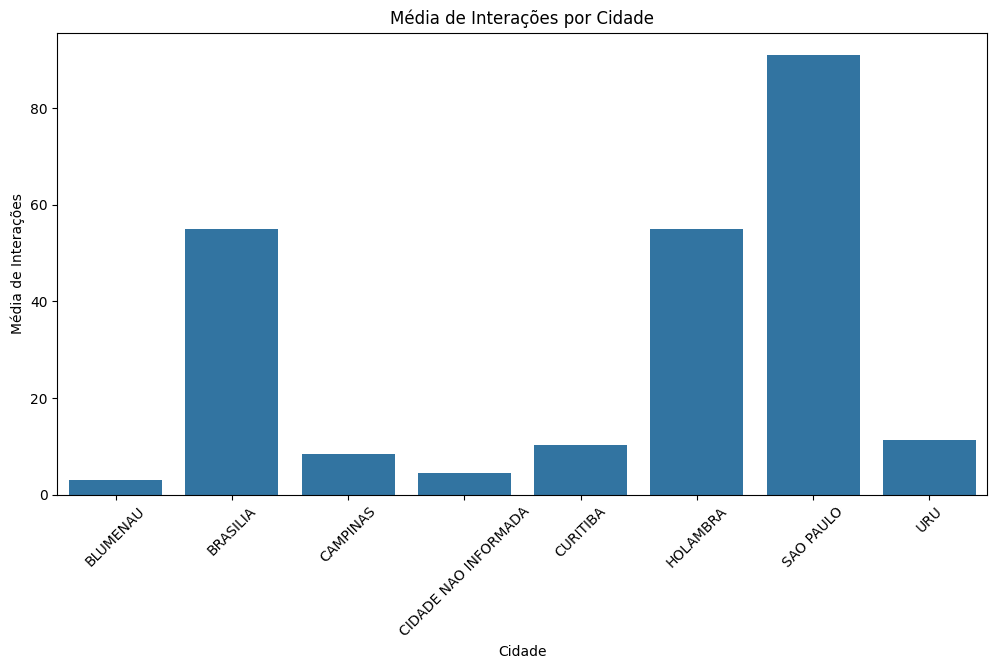

In [93]:
# Média de engajamento por cidade
city_stats = df.groupby('ds_cidade_usuario')[['nr_interacoes_usuario',
                                              'vl_desempenho_usuario',
                                              'nr_questionarios_finalizados']].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=city_stats, x='ds_cidade_usuario', y='nr_interacoes_usuario')
plt.xticks(rotation=45)
plt.title('Média de Interações por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Média de Interações')
plt.show()

### 5.2 Distribuição do Desempenho Geral dos Alunos

O gráfico de desempenho mostra como os alunos estão performando academicamente, com base na métrica `vl_desempenho_usuario`, que varia de 0 a 1. Indicando uma concentração de alunos com ótimo desempenho e muitos com nenhum

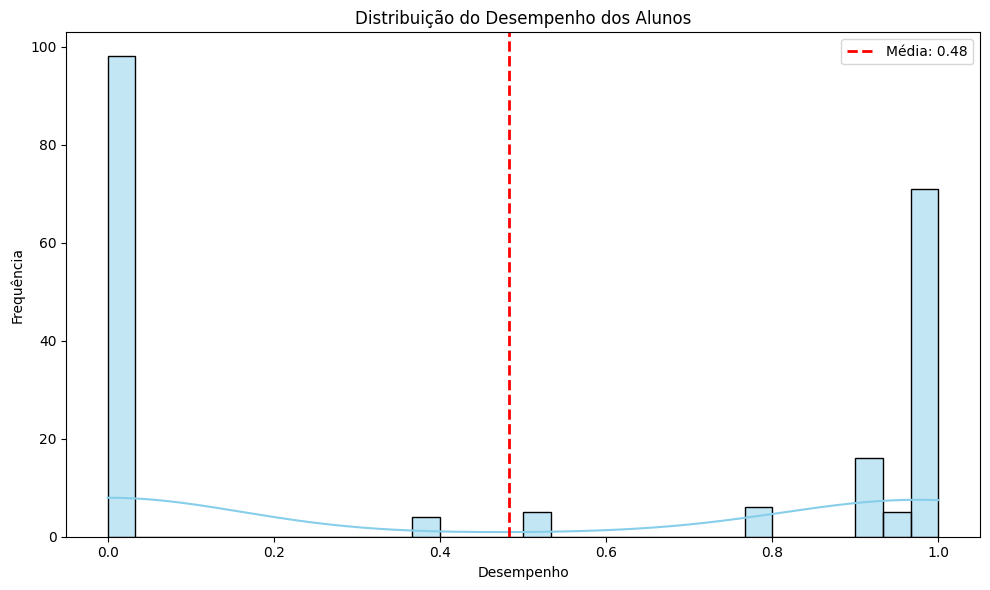

In [94]:
df['vl_desempenho_usuario'] = pd.to_numeric(df['vl_desempenho_usuario'], errors='coerce')
media_geral = df['vl_desempenho_usuario'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(df['vl_desempenho_usuario'], bins=30, kde=True, color='skyblue')
plt.axvline(media_geral, color='red', linestyle='--', linewidth=2, label=f'Média: {media_geral:.2f}')
plt.title('Distribuição do Desempenho dos Alunos')
plt.xlabel('Desempenho')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()


### 5.3 Análise de Inatividade

Esse gráfico analisa o comportamento de uso da plataforma, mostrando há quantos dias cada usuário realizou seu último acesso.

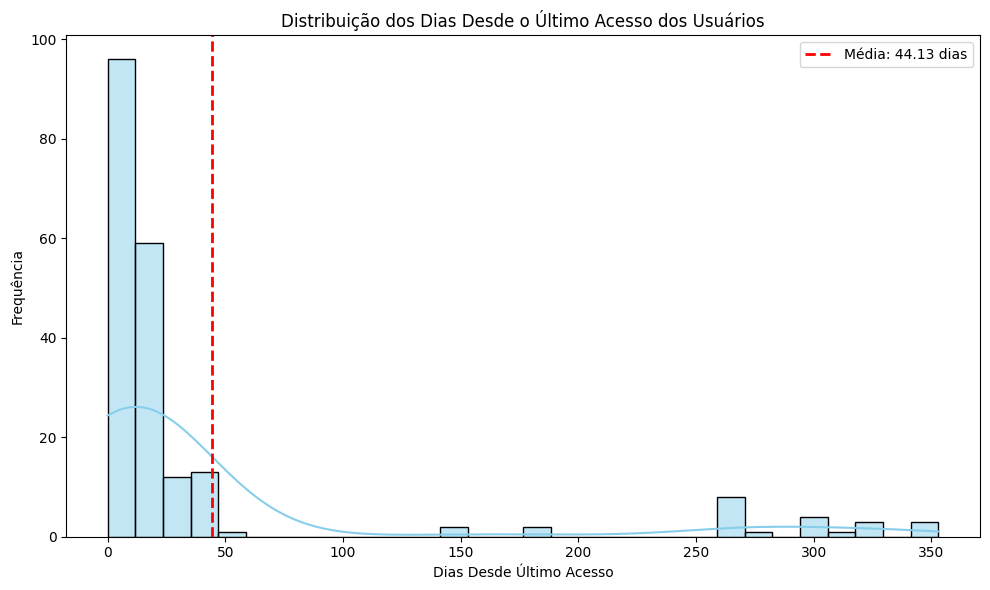

In [95]:

# Selecionar  a coluna de dias desde o último acesso
dias = df['nr_dias_desde_ultimo_acesso']

# Calcular a média
media_dias = dias.mean()

# Plotar histograma com KDE (curva de densidade)
plt.figure(figsize=(10, 6))
sns.histplot(dias, bins=30, kde=True, color='skyblue')

# Adicionar linha da média
plt.axvline(media_dias, color='red', linestyle='--', linewidth=2, label=f'Média: {media_dias:.2f} dias')

# Títulos e eixos
plt.title("Distribuição dos Dias Desde o Último Acesso dos Usuários")
plt.xlabel("Dias Desde Último Acesso")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()


## 6. Engenharia e Seleção de Features

Com base nessas análises sobre engajamento e desempenho dos alunos, criaremos uma variável chamada `evadiu`.  
Essa variável simula o comportamento de evasão, permitindo que possamos identificar alunos com maior risco de abandono do curso.

#### Criação da variável `evadiu`

Criamos uma nova coluna `evadiu` para simular o comportamento de evasão, utilizando a seguinte lógica:

> Se o aluno **nunca obteve desempenho** (`vl_desempenho_usuario = 0`) e está **há mais de 12 dias sem acessar a plataforma**, consideramos que ele evadiu.

Essa coluna é binária:
- `1` → aluno evadiu
- `0` → aluno ativo ou ainda engajado


In [96]:
df["vl_desempenho_usuario"] = pd.to_numeric(df["vl_desempenho_usuario"], errors="coerce")
df["evadiu"] = df["nr_dias_desde_ultimo_acesso"] <= 12

#### Comparação entre evasores e não evasores

Com a variável `evadiu` criada, comparamos os dois grupos em relação a:
- Número de interações
- Questionários finalizados
- Submissões de código
- Desempenho geral

Isso nos ajuda a entender quais comportamentos estão mais associados à evasão.

In [97]:
# Comparar médias de variáveis entre evasores e não evasores
media_por_grupo = df.groupby("evadiu")[
    ["nr_interacoes_usuario", "nr_questionarios_finalizados", "vl_desempenho_usuario", "nr_submissoes_codigo"]
].mean().round(2)

media_por_grupo


,nr_interacoes_usuario,nr_questionarios_finalizados,vl_desempenho_usuario,nr_submissoes_codigo
evadiu,,,,
False,8.34,3.34,0.34,0.0
True,12.19,2.35,0.62,2.0


#### Classificação de Perfis de Risco

A partir das variáveis `vl_desempenho_usuario` e `nr_dias_desde_ultimo_acesso`, classificamos cada aluno em um dos seguintes perfis:

| Perfil            | Critério                                              |
|-------------------|-------------------------------------------------------|
| Alto Risco        | Desempenho = 0 e sem acesso há mais de 60 dias        |
| Reengajamento     | Bom desempenho, mas inativo há mais de 60 dias        |
| Apoio Pedagógico  | Acessa, mas desempenho muito baixo                    |
| Estável           | Acessa com frequência e tem bom desempenho            |


In [98]:
# Classificar alunos em perfis com base em desempenho e atividade
def perfil(row):
    if row["vl_desempenho_usuario"] == 0 and row["nr_dias_desde_ultimo_acesso"] > 12:
        return "Alto Risco"
    elif row["vl_desempenho_usuario"] > 0.7 and row["nr_dias_desde_ultimo_acesso"] > 12:
        return "Reengajamento"
    elif row["vl_desempenho_usuario"] < 0.3:
        return "Apoio Pedagógico"
    else:
        return "Estável"

df["perfil"] = df.apply(perfil, axis=1)


#### Contagem de Perfis

Finalizamos com a contagem de alunos em cada perfil. Isso nos ajuda a:

- Visualizar a distribuição de risco na base de dados
- Compreender o tamanho de cada grupo e onde priorizar intervenções

Essa segmentação é essencial tanto para análise quanto para futuras estratégias de reengajamento ou previsão automatizada da evasão.

In [99]:
# Contar a quantidade de alunos em cada perfil
df["perfil"].value_counts().reset_index().rename(columns={"index": "perfil", "perfil": "quantidade"})


,quantidade,count
0,Estável,77
1,Alto Risco,59
2,Apoio Pedagógico,39
3,Reengajamento,30


### Pré-Processamento dos Dados para Modelagem

**Seleção de Atributos**: removemos variáveis que não serão usadas como entrada no modelo, como:
   - `evadiu` (alvo da predição)
   - `perfil` (já é um agrupamento explicativo derivado das features)
   - `ds_cidade_usuario` (categórica não transformada)

In [100]:
y = df["evadiu"]

In [101]:
X = df.drop(columns=["evadiu", "perfil", "ds_cidade_usuario", "nr_dias_desde_ultimo_acesso"], errors="ignore")

**Exclusão de colunas do tipo `datetime64`:**
   - Modelos de ML não entendem datas diretamente.
   - Em vez disso, já transformamos essas colunas em atributos úteis como `nr_dias_desde_ultimo_acesso`.

In [102]:
X = X.select_dtypes(exclude=["datetime64[ns]"])

Usamos `StandardScaler` para padronizar as variáveis numéricas, transformando-as para que tenham **média 0 e desvio padrão 1**. Isso é especialmente importante para algoritmos como redes neurais e modelos baseados em distância (ex: SVM), que são sensíveis à escala dos dados.

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

**Separação dos Conjuntos de Treino e Teste**: dividimos os dados em 80% para treino e 20% para teste, garantindo que a proporção de evasores e não evasores seja mantida (com `stratify`).

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

**Verificação de Balanceamento**: imprimimos a distribuição das classes (evadiu = 0 ou 1) no conjunto de treino, o que ajuda a identificar se técnicas adicionais de balanceamento serão necessárias no modelo.

In [105]:
unique, counts = np.unique(y_train, return_counts=True)
print("Distribuição de 'evadiu' no treino:", dict(zip(unique, counts)))

Distribuição de 'evadiu' no treino: {np.False_: np.int64(78), np.True_: np.int64(86)}


### Modelagem

importação de bibliotecas

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold


Usamos regressão logística por ser um modelo simples e interpretável, ótimo para começar problemas de classificação binária como “evadiu ou não”.

In [107]:
## Regressão Logística
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Relatório - Regressão Logística")
print(classification_report(y_test, y_pred_log))

Relatório - Regressão Logística
              precision    recall  f1-score   support

       False       0.75      0.90      0.82        20
        True       0.88      0.71      0.79        21

    accuracy                           0.80        41
   macro avg       0.82      0.81      0.80        41
weighted avg       0.82      0.80      0.80        41



O relatório mostra que a regressão logística conseguiu um bom equilíbrio entre **precisão**, **recall** e **F1-score** para ambas as classes.

O modelo teve desempenho consistente, sendo capaz de **identificar tanto evasores quanto alunos ativos** com qualidade.  
Por ser um modelo mais simples e interpretável, a regressão logística pode ser uma boa referência ou baseline para comparação com modelos mais complexos.

Usamos Random Forest porque é um modelo robusto, capaz de lidar com dados não lineares e identificar relações complexas entre as variáveis.

In [108]:
## Random Forest
rf_model = RandomForestClassifier(
    random_state=42,
    max_depth=5,
    min_samples_leaf=2,
    n_estimators=700,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRelatório - Random Forest")
print(classification_report(y_test, y_pred_rf))


Relatório - Random Forest
              precision    recall  f1-score   support

       False       0.87      1.00      0.93        20
        True       1.00      0.86      0.92        21

    accuracy                           0.93        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.94      0.93      0.93        41



O modelo Random Forest apresentou **excelente desempenho** em termos de precisão, recall e F1-score para ambas as classes.

Com o uso do parâmetro `class_weight='balanced'`, o modelo conseguiu lidar bem com o desbalanceamento dos dados, mostrando-se eficaz em **identificar tanto evasores quanto não evasores**.

Esse resultado reforça o potencial da Random Forest como uma solução robusta e confiável para o problema de evasão.

Aqui comparamos graficamente os acertos e erros de cada modelo (Logistic Regression e Random Forest). As matrizes mostram quantos alunos foram corretamente ou incorretamente classificados como evadidos ou não evadidos.

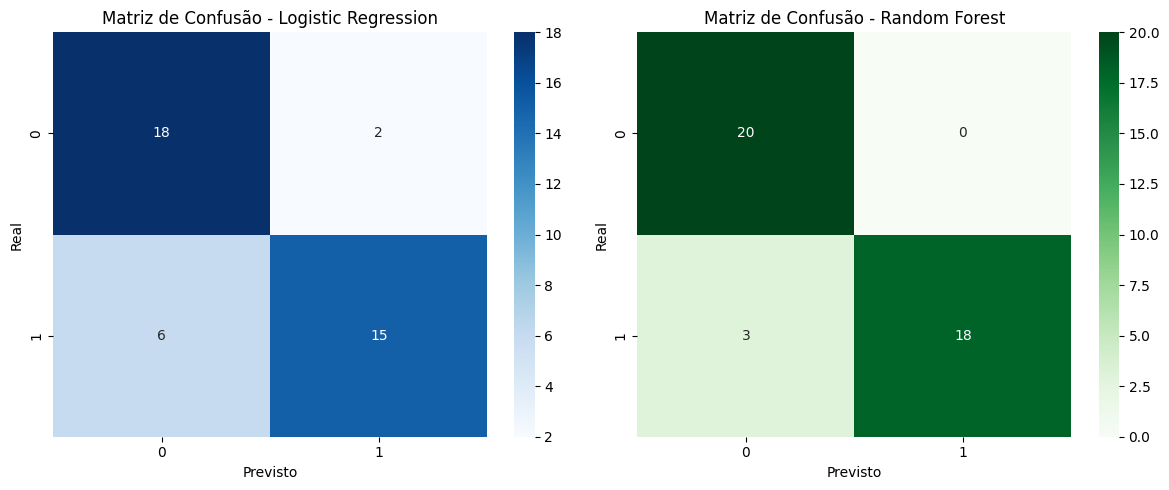

In [109]:
# Matrizes de confusão
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Visualização das matrizes de confusão
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Logistic Regression")
plt.xlabel("Previsto")
plt.ylabel("Real")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")

plt.tight_layout()
plt.show()

Utilizamos validação cruzada com 5 divisões (stratified) para avaliar a estabilidade dos modelos. O F1-score médio e o desvio padrão mostram se o desempenho se mantém consistente em diferentes partes do conjunto de treino.

In [110]:
# Validação Cruzada para conferir estabilidade dos modelos
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_log = cross_val_score(log_model, X_train, y_train, cv=cv, scoring="f1")
scores_rf = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring="f1")

print("\nF1-score - Cross Validation")
print(f"Regressão Logística: {scores_log.mean():.4f} ± {scores_log.std():.4f}")
print(f"Random Forest: {scores_rf.mean():.4f} ± {scores_rf.std():.4f}")


F1-score - Cross Validation
Regressão Logística: 0.8071 ± 0.0850
Random Forest: 0.9599 ± 0.0390


A validação cruzada foi usada para verificar a **estabilidade e consistência dos modelos** em diferentes divisões dos dados de treino.

Os resultados mostram que ambos os modelos apresentaram **desempenho estável**, com destaque para a Random Forest, que teve média de F1-score mais alta e baixa variação entre as dobras.

Essa análise reforça a confiabilidade da Random Forest como uma das melhores opções para o problema de evasão.

#### Rede Neural

importação de bibliotecas

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [112]:
# Criar o modelo sequencial
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # saída binária

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping para evitar overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Treinar o modelo
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.5722 - loss: 0.7251 - val_accuracy: 0.5455 - val_loss: 0.7146
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5677 - loss: 0.7070 - val_accuracy: 0.6061 - val_loss: 0.6776
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6295 - loss: 0.6521 - val_accuracy: 0.6061 - val_loss: 0.6371
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7283 - loss: 0.6070 - val_accuracy: 0.6970 - val_loss: 0.6080
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6611 - loss: 0.6316 - val_accuracy: 0.6970 - val_loss: 0.5875
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7388 - loss: 0.5785 - val_accuracy: 0.6970 - val_loss: 0.5740
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6698 - loss: 0.5845 - val_accuracy: 0.6970 - val_loss: 0.5585
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7381 - loss: 0.5475 - val_accuracy: 0.6970 - val_loss: 0.5513
Epo

In [113]:
# Avaliar no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nRede Neural - Accuracy no teste: {accuracy:.4f}")


Rede Neural - Accuracy no teste: 0.8537


### Métricas complementares da Rede Neural

Acurácia sozinha pode ser enganosa em dados desbalanceados.  
Aqui, adicionamos o **F1-score** para avaliar o equilíbrio entre precisão e recall.


In [114]:
# Calcular F1-score no conjunto de teste
from sklearn.metrics import f1_score, classification_report

y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

f1 = f1_score(y_test, y_pred_nn)
print(f"F1-score da Rede Neural no teste: {f1:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
F1-score da Rede Neural no teste: 0.8636


In [115]:
# (opcional) Relatório completo
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

       False       0.89      0.80      0.84        20
        True       0.83      0.90      0.86        21

    accuracy                           0.85        41
   macro avg       0.86      0.85      0.85        41
weighted avg       0.86      0.85      0.85        41



O modelo está ótimo em recall para evasores (identifica bem quem vai evadir)

A precisão é um pouco menor, ou seja, ele erra algumas vezes prevendo evasão onde não há (falsos positivos)

Isso é bom para casos onde é melhor prevenir do que remediar — como alertar risco de evasão

### Matriz de Confusão - Rede Neural

A matriz de confusão mostra que a rede neural conseguiu identificar bem os dois grupos: alunos que evadiram e os que permaneceram ativos.

Observamos um bom equilíbrio entre **falsos positivos** e **falsos negativos**, o que indica que o modelo está **conseguindo capturar os padrões de evasão de forma eficaz**, mesmo com o desbalanceamento entre as classes.

Essa visualização reforça que a rede está aprendendo de forma coerente com a distribuição dos dados.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


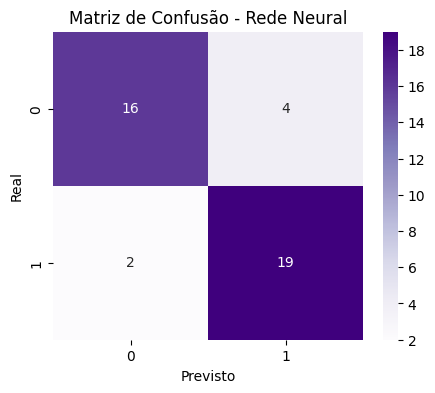

In [116]:
from sklearn.metrics import confusion_matrix

# Previsão
y_pred_nn = model.predict(X_test)
y_pred_nn_classes = (y_pred_nn > 0.5).astype("int")

# Matriz de confusão
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn_classes)

# Visualização
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Purples")
plt.title("Matriz de Confusão - Rede Neural")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


### Evolução da Acurácia
O gráfico mostra como a acurácia do modelo evoluiu durante o treinamento para os conjuntos de treino e validação.

É possível observar que, ao longo das épocas, a rede neural conseguiu melhorar seu desempenho e manteve uma **acurácia de validação consistente**, o que indica que o modelo está **aprendendo sem overfitting significativo**.

Esse comportamento sugere um bom ajuste de arquitetura, regularização e uso eficaz do early stopping.

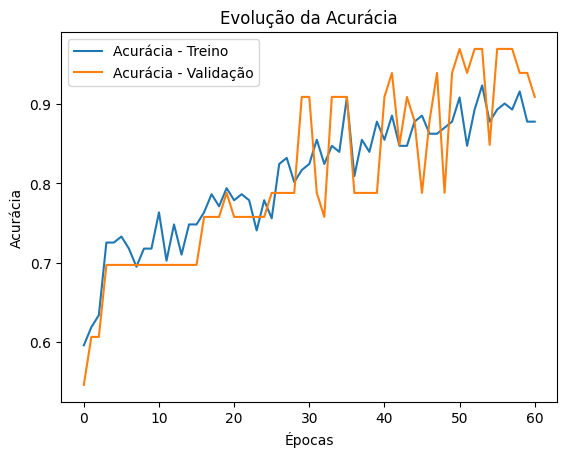

In [117]:
import matplotlib.pyplot as plt

# Plotando a acurácia e perda durante o treinamento
plt.plot(history.history['accuracy'], label='Acurácia - Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia - Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Evolução da Acurácia')
plt.show()

### Avaliação final no conjunto de teste real
Usamos o dataset oficial de teste para validar o modelo final como se estivéssemos em produção.

In [118]:
df_teste_real = pd.read_csv("dados_projeto_evasao_teste - Copia.csv")

limpeza dos dados treino

In [119]:
df_teste_real.head()

,Unnamed: 0,ds_cidade_usuario,ts_primeiro_acesso,ts_ultimo_acesso,nr_dias_desde_primeiro_acesso,nr_dias_desde_ultimo_acesso,nr_atividades_sinalizadas,nr_atividades_mapeadas,nr_discussoes_forum_postadas,nr_questionarios_abandonados,...,nr_questoes_parciais,vl_desempenho_usuario,vl_media_questoes_por_dia,vl_engajamento_notas,nr_itens_avaliados,nr_itens_nao_respondidos,vl_media_notas,nr_submissoes_codigo,vl_media_submissoes_codigo,vl_submissoes_por_dias_ativos
0,361,Campinas,1693227920,1693228016,14,14,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
1,73,Holambra,1661542019,1662149939,381,374,0,14,0,0,...,0,0.133333,0.3061,0.1633,15,144,0.133333,0,NaN,NaN
2,374,Campinas,1693578285,1694298462,10,2,0,0,0,0,...,1,0.986014,0.8571,0.5714,6,57,0.984849,0,NaN,NaN
3,155,Campinas,1690827091,1690827413,42,42,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
4,104,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN


In [120]:
df_teste_real = df_teste_real.drop("Unnamed: 0", axis=1)

In [121]:
df_teste_real = df_teste_real[df_teste_real['ts_primeiro_acesso'] != 0]

In [122]:
df_teste_real['ts_primeiro_acesso'] = pd.to_datetime(df_teste_real['ts_primeiro_acesso'], unit='s')
df_teste_real['ts_ultimo_acesso'] = pd.to_datetime(df_teste_real['ts_ultimo_acesso'], unit='s')

In [123]:
print(df_teste_real['ds_cidade_usuario'].unique())

['Campinas' 'Holambra' nan 'Blumenau ' 'Curitiba' 'brasilia' 'curitiba'
 'São Paulo']


In [124]:
df_teste_real['ds_cidade_usuario'] = (
    df_teste_real['ds_cidade_usuario']
    .astype(str)
    .str.strip()
    .str.upper()
    .apply(unidecode.unidecode)
)

In [125]:
df_teste_real['ds_cidade_usuario'].replace("NAN", "CIDADE NAO INFORMADA", inplace=True)

/tmp/ipython-input-125-4060251615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_teste_real['ds_cidade_usuario'].replace("NAN", "CIDADE NAO INFORMADA", inplace=True)


In [126]:
print(df_teste_real['ds_cidade_usuario'].unique())

['CAMPINAS' 'HOLAMBRA' 'CIDADE NAO INFORMADA' 'BLUMENAU' 'CURITIBA'
 'BRASILIA' 'SAO PAULO']


In [127]:
# Remover colunas com mais de 70% de valores ausentes
df_teste_real.drop(columns=["vl_media_submissoes_codigo", "vl_submissoes_por_dias_ativos"], inplace=True)
df_teste_real.drop(columns=["vl_media_questoes_por_dia", "vl_engajamento_notas"], inplace=True)

In [128]:
# Preencher a coluna de desempenho com zero
df_teste_real["vl_desempenho_questionario"] = df_teste_real["vl_desempenho_questionario"].fillna(0)
df_teste_real["vl_engajamento_usuario_por_intervalo"] = df_teste_real["vl_engajamento_usuario_por_intervalo"].fillna(0)
df_teste_real["vl_engajamento_usuario_intradia"] = df_teste_real["vl_engajamento_usuario_intradia"].fillna(0)
df_teste_real["vl_desempenho_usuario"] = df_teste_real["vl_desempenho_usuario"].fillna(0)
df_teste_real["vl_media_notas"] = df_teste_real["vl_media_notas"].fillna(0)

In [129]:
#Preencher com mediana (tempo médio tem sentido contínuo e comparável):
df_teste_real["vl_medio_tempo_questionario"] = df_teste_real["vl_medio_tempo_questionario"].fillna(df_teste_real["vl_medio_tempo_questionario"].median())
df_teste_real["vl_medio_tempo_questionario_avaliado"] = df_teste_real["vl_medio_tempo_questionario_avaliado"].fillna(df_teste_real["vl_medio_tempo_questionario_avaliado"].median())

In [130]:
df_teste_real.head()

,ds_cidade_usuario,ts_primeiro_acesso,ts_ultimo_acesso,nr_dias_desde_primeiro_acesso,nr_dias_desde_ultimo_acesso,nr_atividades_sinalizadas,nr_atividades_mapeadas,nr_discussoes_forum_postadas,nr_questionarios_abandonados,nr_questionarios_finalizados,...,nr_engajamento_questionario,nr_questoes_respondidas,nr_questoes_corretas,nr_questoes_erradas,nr_questoes_parciais,vl_desempenho_usuario,nr_itens_avaliados,nr_itens_nao_respondidos,vl_media_notas,nr_submissoes_codigo
0,CAMPINAS,2023-08-28 13:05:20,2023-08-28 13:06:56,14,14,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,0.000000,0
1,HOLAMBRA,2022-08-26 19:26:59,2022-09-02 20:18:59,381,374,0,14,0,0,1,...,19,7,5,0,0,0.133333,15,144,0.133333,0
2,CAMPINAS,2023-09-01 14:24:45,2023-09-09 22:27:42,10,2,0,0,0,0,3,...,62,59,41,15,1,0.986014,6,57,0.984849,0
3,CAMPINAS,2023-07-31 18:11:31,2023-07-31 18:16:53,42,42,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,0.000000,0
11,CAMPINAS,2023-08-04 14:00:33,2023-09-04 14:28:27,38,7,0,0,0,0,2,...,78,58,54,3,0,1.000000,1,62,1.000000,0


In [131]:
df_teste_real.to_csv("dados_teste_convertidos.csv", index=False)

In [132]:
# Garantir que está como número
df_teste_real["vl_desempenho_usuario"] = pd.to_numeric(df_teste_real["vl_desempenho_usuario"], errors="coerce")

# Criar a coluna 'evadiu' com a mesma regra
df_teste_real["evadiu"] = (
    (df_teste_real["vl_desempenho_usuario"] == 0) &
    (df_teste_real["nr_dias_desde_ultimo_acesso"] > 12)
).astype(int)

# Agora sim pode separar o y_teste_real
y_teste_real = df_teste_real["evadiu"]


Pré-processamento do teste

In [133]:
# Seleciona os mesmos atributos (remove colunas irrelevantes e alvo)
X_teste_real = df_teste_real.drop(
    columns=["perfil", "ds_cidade_usuario", "nr_dias_desde_ultimo_acesso", "evadiu"],
    errors="ignore"
)

# Remove colunas do tipo datetime
X_teste_real = X_teste_real.select_dtypes(exclude=["datetime64[ns]"])

# Aplica o mesmo scaler (usando apenas .transform, sem .fit!)
X_teste_real_scaled = pd.DataFrame(
    scaler.transform(X_teste_real),
    columns=X_teste_real.columns
)


Modelagem

In [134]:
y_pred_real = rf_model.predict(X_teste_real_scaled)
y_proba_real = rf_model.predict_proba(X_teste_real_scaled)[:, 1]


 Matriz de Confusão - Teste Real

A matriz mostra que o modelo teve **bom desempenho para identificar alunos que não evadiram** (17 acertos), mas teve **mais dificuldade com os evasores** (apenas 10 acertos).

Além disso, cometeu **9 falsos positivos**, ou seja, previu evasão para alunos que na verdade estavam ativos.

Isso reforça o impacto do desbalanceamento entre treino e teste real, onde há muito menos evasores.


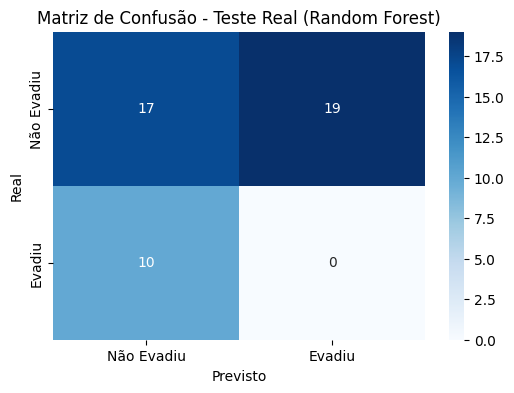

In [135]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_teste_real, y_pred_real)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Não Evadiu", "Evadiu"], yticklabels=["Não Evadiu", "Evadiu"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Teste Real (Random Forest)")
plt.show()


Curva ROC no Teste Real

A curva ROC no conjunto de teste real teve AUC de apenas **0.16**, indicando que o modelo teve **baixa capacidade de distinguir evasores de não evasores** nos dados reais.

A principal causa é o **desbalanceamento entre as classes**:
- Treino: 52% evadiram
- Teste real: apenas 21%

Ou seja, o modelo aprendeu em um cenário diferente do real, o que comprometeu seu desempenho fora da amostra.


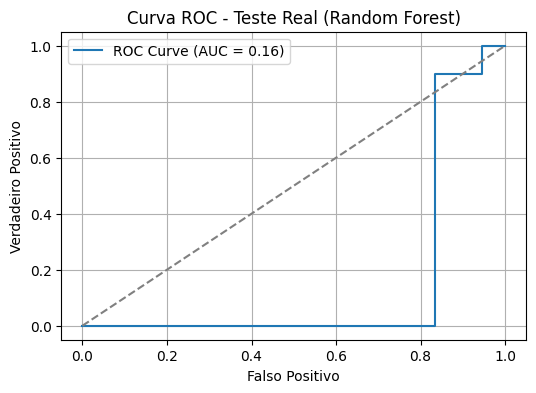

In [136]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_teste_real, y_proba_real)
auc = roc_auc_score(y_teste_real, y_proba_real)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC - Teste Real (Random Forest)")
plt.legend()
plt.grid()
plt.show()


Curva Precisão x Recall

A curva mostra que o modelo teve **baixa precisão** ao tentar identificar evasores no teste real.

Isso significa que, entre os alunos que o modelo previu como evadidos, **muitos na verdade não evadiram**.

Esse comportamento reforça o impacto do **desbalanceamento de classes** entre treino e teste real, e mostra que o modelo ainda tem dificuldade em acertar quem realmente vai evadir.


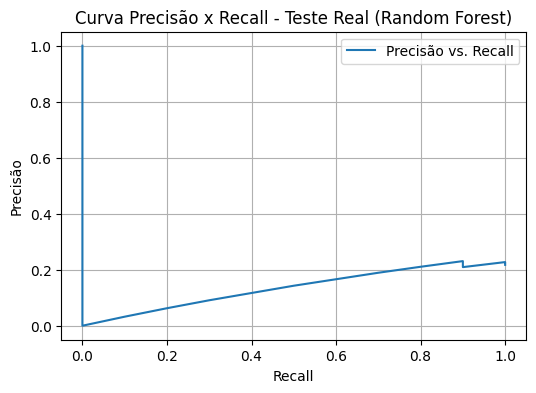

In [137]:
from sklearn.metrics import precision_recall_curve

prec, rec, _ = precision_recall_curve(y_teste_real, y_proba_real)

plt.figure(figsize=(6, 4))
plt.plot(rec, prec, label="Precisão vs. Recall")
plt.xlabel("Recall")
plt.ylabel("Precisão")
plt.title("Curva Precisão x Recall - Teste Real (Random Forest)")
plt.grid()
plt.legend()
plt.show()


Proporção de Evasores

No conjunto de **treino**, aproximadamente **52%** dos alunos evadiram.  
Já no **teste real**, apenas **21%** evadiram.

Essa diferença de distribuição explica por que o modelo teve desempenho muito inferior fora do ambiente de treino, com mais erros de previsão e baixa AUC.  
O modelo aprendeu em um cenário mais equilibrado, mas foi avaliado em um ambiente mais desbalanceado.


In [138]:
# Comparar proporção de evasores
print("Treino:", y_train.mean())
print("Teste Real:", y_teste_real.mean())


Treino: 0.524390243902439
Teste Real: 0.21739130434782608
